In [4]:
import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.utils import save_image
from torchvision.datasets import MNIST
import os

if not os.path.exists('./dc_img'):
    os.mkdir('./dc_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 1e-3

img_transform = transforms.Compose([
transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

dataset = MNIST('./data', transform=img_transform,download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding=1),  # b, 16, 10, 10
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),  # b, 16, 5, 5
            nn.Conv2d(16, 8, 3, stride=2, padding=1),  # b, 8, 3, 3
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)  # b, 8, 2, 2
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),  # b, 16, 5, 5
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),  # b, 8, 15, 15
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride=2, padding=1),  # b, 1, 28, 28
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


model = autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,
                             weight_decay=1e-5)

for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = Variable(img)
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch+1, num_epochs, loss.item()))
    if epoch % 10 == 0:
        pic = to_img(output.data)
        save_image(pic, './dc_img/image_{}.png'.format(epoch))

torch.save(model.state_dict(), './conv_autoencoder.pth')

epoch [1/100], loss:0.2555
epoch [2/100], loss:0.1846
epoch [3/100], loss:0.1565
epoch [4/100], loss:0.1412
epoch [5/100], loss:0.1259
epoch [6/100], loss:0.1265
epoch [7/100], loss:0.1237
epoch [8/100], loss:0.1190
epoch [9/100], loss:0.1201
epoch [10/100], loss:0.1122
epoch [11/100], loss:0.1130
epoch [12/100], loss:0.1179
epoch [13/100], loss:0.1197
epoch [14/100], loss:0.1052
epoch [15/100], loss:0.1094
epoch [16/100], loss:0.1129
epoch [17/100], loss:0.1087
epoch [18/100], loss:0.1106
epoch [19/100], loss:0.1105
epoch [20/100], loss:0.1093
epoch [21/100], loss:0.1050
epoch [22/100], loss:0.0975
epoch [23/100], loss:0.1104
epoch [24/100], loss:0.1069
epoch [25/100], loss:0.0992
epoch [26/100], loss:0.1044
epoch [27/100], loss:0.1028
epoch [28/100], loss:0.0972
epoch [29/100], loss:0.1002
epoch [30/100], loss:0.1020
epoch [31/100], loss:0.0976
epoch [32/100], loss:0.0988
epoch [33/100], loss:0.0978
epoch [34/100], loss:0.1000
epoch [35/100], loss:0.0990
epoch [36/100], loss:0.1006
e

TypeError: Invalid shape (28, 28, 1) for image data

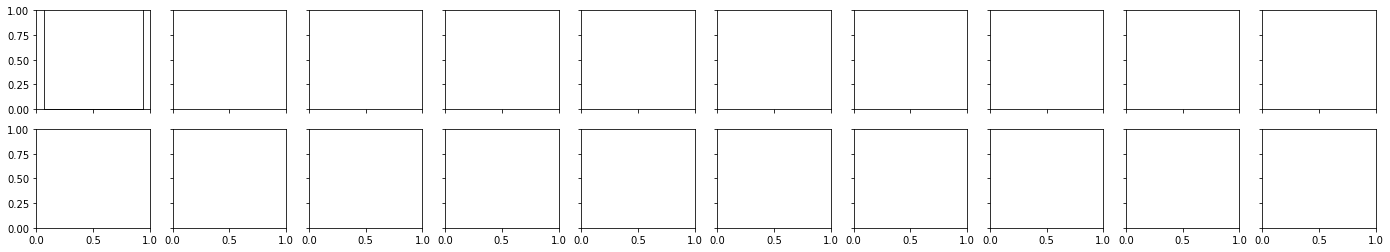

In [27]:
# obtain one batch of test images
dataiter = iter(dataloader)
images, labels = dataiter.next()
import matplotlib.pyplot as plt
import numpy as np
# get sample outputs

output = model(images)
# prep images for display
images = images.numpy()
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  

# output is resized into a batch of iages
output = output.view(128,1, 28, 28)
# use detach when it's an output that requires_grad
output = output.detach().numpy()

# # plot the first ten input images and then reconstructed images
# fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))

# # input images on top row, reconstructions on bottom
# for images, row in zip([images, output], axes):
#     for img, ax in zip(images, row):
#         ax.imshow(np.squeeze(img))
#         ax.get_xaxis().set_visible(False)
#         ax.get_yaxis().set_visible(False)

# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(output[idx])
    ax.set_title(classes[labels[idx]])
    
# plot the first ten input images and then reconstructed images
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(24,4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

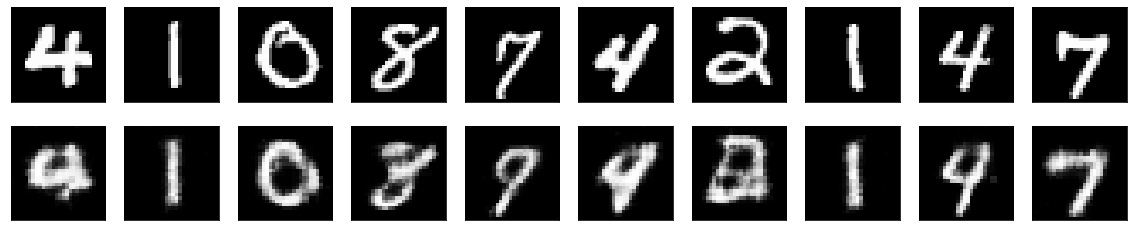

In [26]:
import matplotlib.pyplot as plt
# obtain one batch of test images
dataiter = iter(dataloader)
images, labels = dataiter.next()
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    z = (model(images[i].reshape(1,1,28, 28))).reshape(28, 28)
    plt.imshow(z.detach().numpy())
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()